In [1]:
%pip install pandas
%pip install pandas
%pip install matplotlib
%pip install statsmodels

     |████████████████████████████████| 11.7 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 111.8 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 110.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.3 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 99.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 111.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 98.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: 

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
!ls

ARIMA_BASICS.ipynb  SARIMA.ipynb	   time_resample.ipynb
AR.ipynb	    time_acf.ipynb	   time_series.ipynb
Arma_ARIMA.html     time_airline.ipynb	   time_statsmodel.ipynb
Arma_ARIMA.ipynb    time_arima.ipynb	   time_winters.ipynb
Desp_stats.ipynb    time_forcasting.ipynb  UDEMY_TSA_FINAL


In [19]:
!gp init


In [ ]:
%pip install pmdarima
        

In [7]:
from pmdarima import auto_arima

In [9]:
df = pd.read_csv("UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv")

In [10]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [11]:

df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [14]:
df.set_index('date')

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


In [15]:
df.index.freq= 'MS'

<AxesSubplot:>

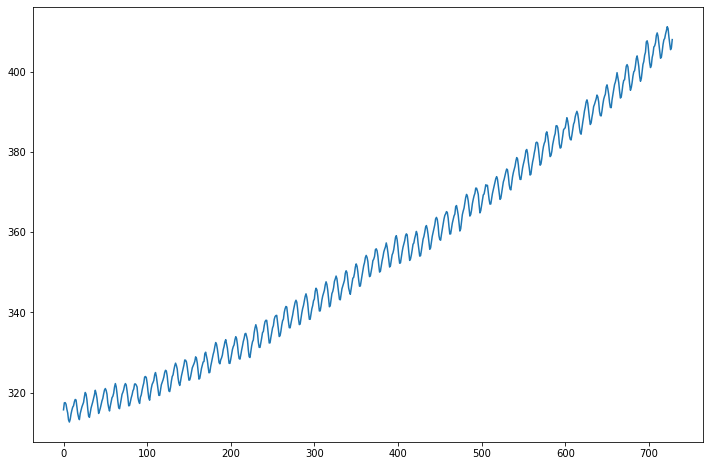

In [16]:
df['interpolated'].plot(figsize=(12,8))